In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Mall_Customers.csv')
data.head(10)

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<function matplotlib.pyplot.show>

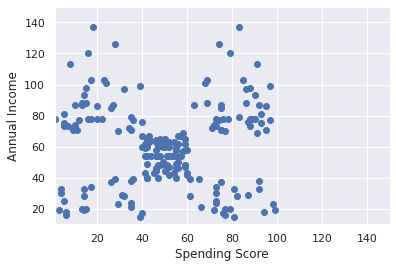

In [ ]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.xlim(1,150)
plt.ylim(10,150)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show

In [ ]:
data[["Annual Income (k$)", "Spending Score (1-100)"]].groupby(['Annual Income (k$)'], as_index=False).mean().sort_values(by='Spending Score (1-100)', ascending=False)

,Annual Income (k$),Spending Score (1-100)
38,69,74.50
57,99,68.00
7,23,63.50
16,38,63.50
45,76,63.50
...,...,...
42,73,43.25
1,16,41.50
43,74,41.00
9,25,39.00


<function matplotlib.pyplot.show>

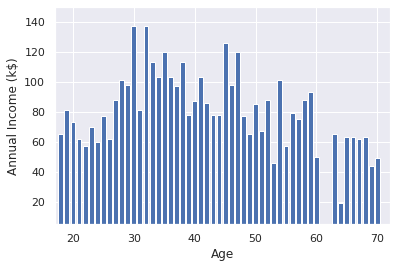

In [ ]:
plt.bar(data['Age'],data['Annual Income (k$)'])
plt.xlim(17,72)
plt.ylim(5,150)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show

<function matplotlib.pyplot.show>

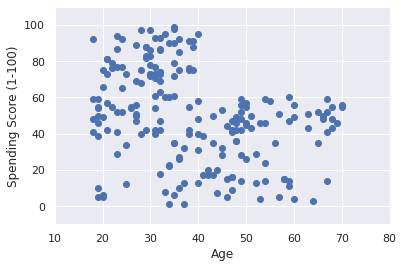

In [ ]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.ylim(-10,110)
plt.xlim(10,80)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show

In [ ]:
data[["Gender", "Spending Score (1-100)"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Spending Score (1-100)', ascending=False)

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


In [ ]:
data[["Age", "Spending Score (1-100)"]].groupby(['Age'], as_index=False).mean().sort_values(by='Spending Score (1-100)', ascending=False)

,Age,Spending Score (1-100)
21,39,84.666667
12,30,80.285714
11,29,76.600000
6,24,71.500000
4,22,70.000000
10,28,70.000000
3,21,66.800000
14,32,66.000000
17,35,63.888889
13,31,63.875000


In [ ]:
data["Gender_Code"] = np.where(data["Gender"].str.contains("male"), 0, 1)
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Code
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


In [ ]:
new_df = data.drop(columns= ['CustomerID', 'Gender', 'Age', 'Gender_Code'])
new_df.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [ ]:
kmeans = KMeans(5)
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
indentified_clusters = kmeans.fit_predict(new_df)
indentified_clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = indentified_clusters
data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Code,Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,2


<function matplotlib.pyplot.show>

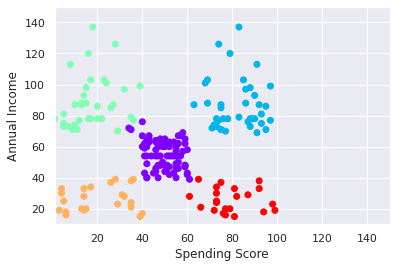

In [ ]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(1,150)
plt.ylim(10,150)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show

In [ ]:
kmeans.inertia_

44448.45544793371

In [ ]:
wcss=[]

for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(new_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37271.8862365895]